<a href="https://colab.research.google.com/github/tejalvs/RobotOdometryMining/blob/main/ModellingROOMBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
roomba_data=pd.read_csv('/content/drive/MyDrive/RoombaData_XY_cleaned.csv')
roomba_data=roomba_data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
roomba_data.columns

Index(['X_ODOM', 'Y_ODOM', 'Theta', 'Velocity', 'Odometry_Distance', 'X_GR',
       'Y_GR', 'Ground_Truth_Distance', 'Surface_Type', 'Time_To_Travel',
       'Cumulative_Time', 'Cumulative_Theta', 'Series_ID',
       'Distance_travelled_error', 'X_error', 'Y_error', 'timestamp'],
      dtype='object')

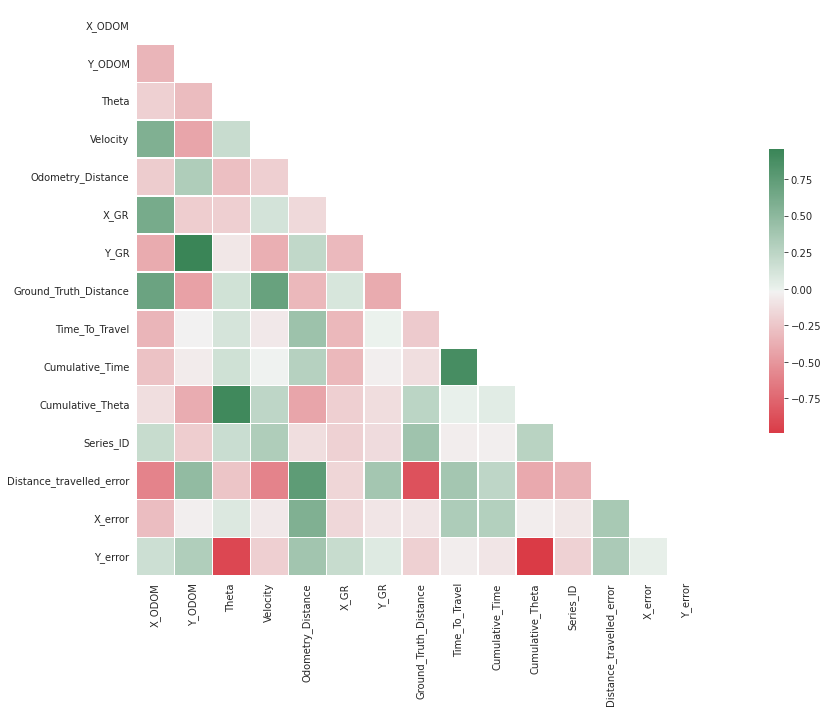

In [169]:
corr1 = roomba_data.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr1, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(1,1,figsize=(18, 10))
cmap = sns.diverging_palette(10, 500, as_cmap=True)
sns.heatmap(corr1, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5})
f.tight_layout()

In [170]:
label=[]
for i in roomba_data['Distance_travelled_error']:
  if i>0.01:
    label.append(1)
  else:
    label.append(0)
roomba_data['Label']=label


In [171]:
roomba_df=roomba_data[['Velocity','Cumulative_Time','Cumulative_Theta','X_error', 'Y_error','Label']]


In [172]:
X = roomba_df.iloc[:, :-1]
Y = roomba_df.iloc[:, -1]


In [173]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15)

print("Shape of train data of X = % s and Y = % s "%(x_train.shape, y_train.shape)) 
print("Shape of test data of X = % s and Y = % s"%(x_test.shape, y_test.shape)) 


Shape of train data of X = (3242, 5) and Y = (3242,) 
Shape of test data of X = (573, 5) and Y = (573,)


In [174]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)

In [175]:
#Calculating the Mean-Squared Error(MSE):
mse = np.mean((y_pred - y_test)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.09021057282148183


In [176]:
lreg_coef = pd.DataFrame()
lreg_coef['Columns']= x_train.columns
lreg_coef['Coefficient Estimate']= pd.Series(lreg.coef_)
lreg_coef

,Columns,Coefficient Estimate
0,Velocity,-0.161119
1,Cumulative_Time,0.000009
2,Cumulative_Theta,0.000125
3,X_error,0.049271
4,Y_error,0.078948


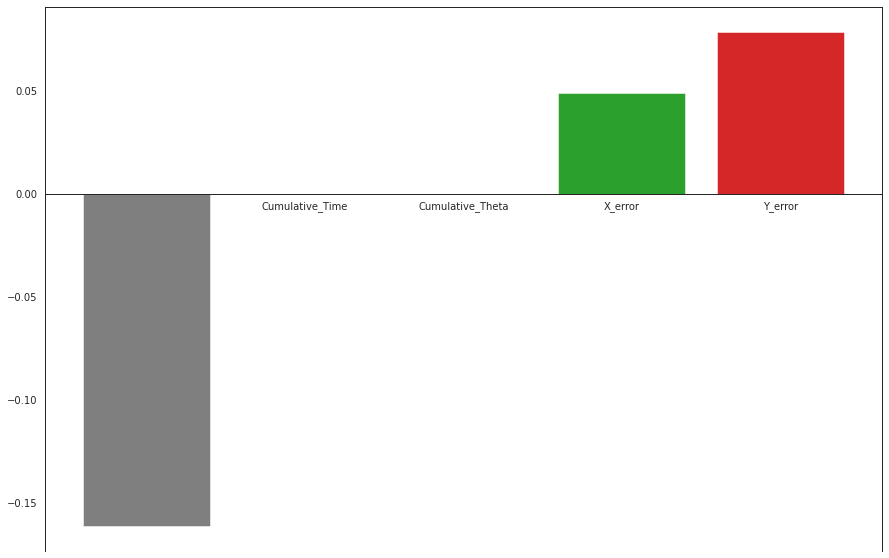

In [177]:
#plotting the coefficient score
fig, ax = plt.subplots(figsize=(15,10))
color =['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',  
        'tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive'] 

ax.bar(lreg_coef["Columns"],  
lreg_coef['Coefficient Estimate'],  
color = color) 
ax.spines['bottom'].set_position('zero') 
ax.axes.xaxis.set_ticklabels(lreg_coef["Columns"])
ax.axes.xaxis.label.set_color('White')
plt.style.use('ggplot') 
plt.show()


In [178]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

In [179]:
##Calculating the Mean-Squared Error(MSE):
mse1 = np.mean((y_pred1 - y_test)**2)
print("Mean Squared Error: ", mse1)

Mean Squared Error:  0.09353155372974112


In [182]:
"""putting together the coefficient and their corresponding variable names"""
lasso_coef = pd.DataFrame()
lasso_coef['Columns'] = x_train.columns
lasso_coef['Coefficient Estimate'] = pd.Series(lasso.coef_)
lasso_coef

,Columns,Coefficient Estimate
0,Velocity,-0.000000
1,Cumulative_Time,0.000017
2,Cumulative_Theta,-0.000215
3,X_error,0.000000
4,Y_error,0.000000


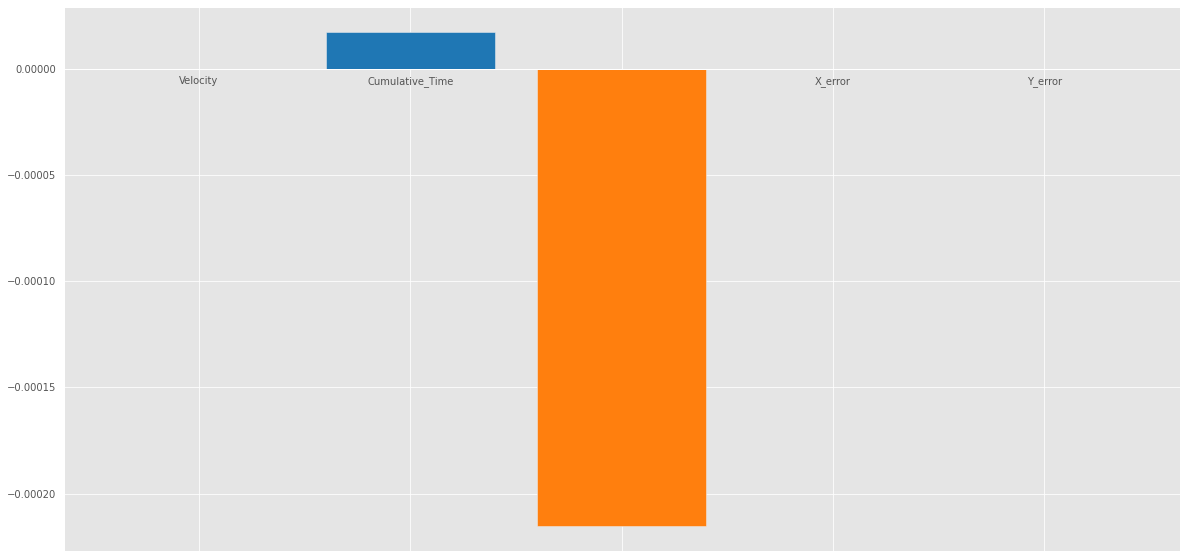

In [183]:
#plotting the coefficient score
fig, ax = plt.subplots(figsize=(20,10))
color =['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',  
        'tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive'] 

ax.bar(lasso_coef["Columns"],  
lasso_coef['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

In [184]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred2 = ridge.predict(x_test)


In [185]:
# Calculating the Mean Squared Error
mse2 = np.mean((y_pred2 - y_test)**2)
print("Mean Square Error:", mse2)


Mean Square Error: 0.09021059830049258


In [187]:
"""putting together the coefficient and their corresponding variable names"""
ridge_coef = pd.DataFrame()
ridge_coef['Columns'] = x_train.columns
ridge_coef['Coefficient Estimate'] = pd.Series(ridge.coef_)
ridge_coef

,Columns,Coefficient Estimate
0,Velocity,-0.159709
1,Cumulative_Time,0.000009
2,Cumulative_Theta,0.000076
3,X_error,0.049192
4,Y_error,0.069172


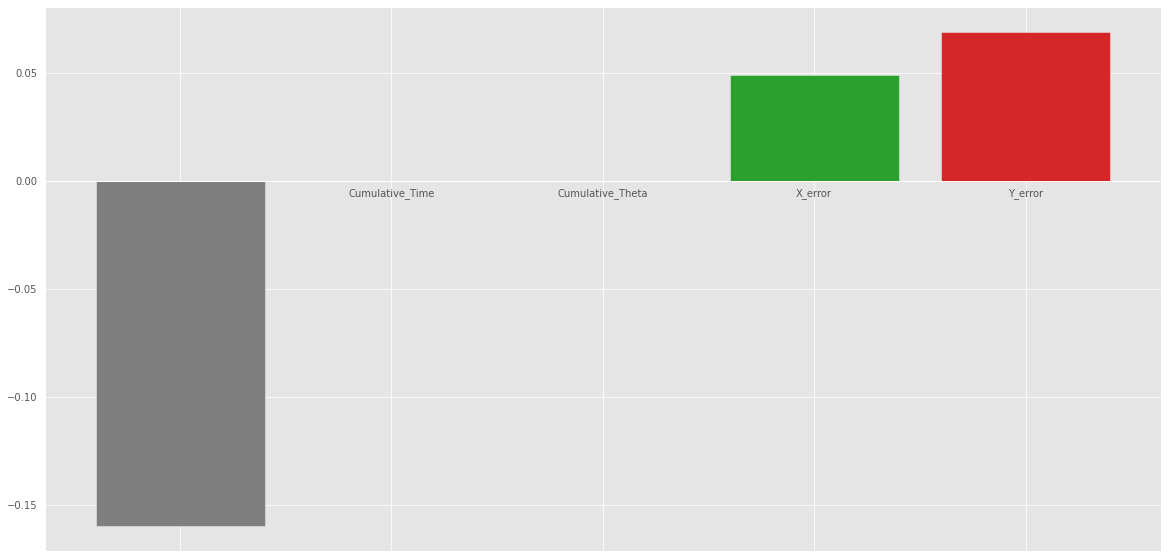

In [188]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize=(20,10))
color =['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',  
        'tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive'] 

ax.bar(ridge_coef["Columns"],  
ridge_coef['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

In [189]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
enet.fit(x_test, y_test)
y_pred3 = enet.predict(x_test)

In [190]:
#Calculating0 the Mean Squared Error
mse3 = np.mean((y_pred3 - y_test)**2)
print("Mean Squared Error:", mse3)

Mean Squared Error: 0.09325016355920031


In [192]:
"""putting together the coefficient and their corresponding variable names"""
enet_coef = pd.DataFrame()
enet_coef['Columns'] = x_train.columns
enet_coef['Coefficient Estimate'] = pd.Series(enet.coef_)
enet_coef

,Columns,Coefficient Estimate
0,Velocity,-0.000000
1,Cumulative_Time,0.000004
2,Cumulative_Theta,-0.000243
3,X_error,0.000000
4,Y_error,0.000000


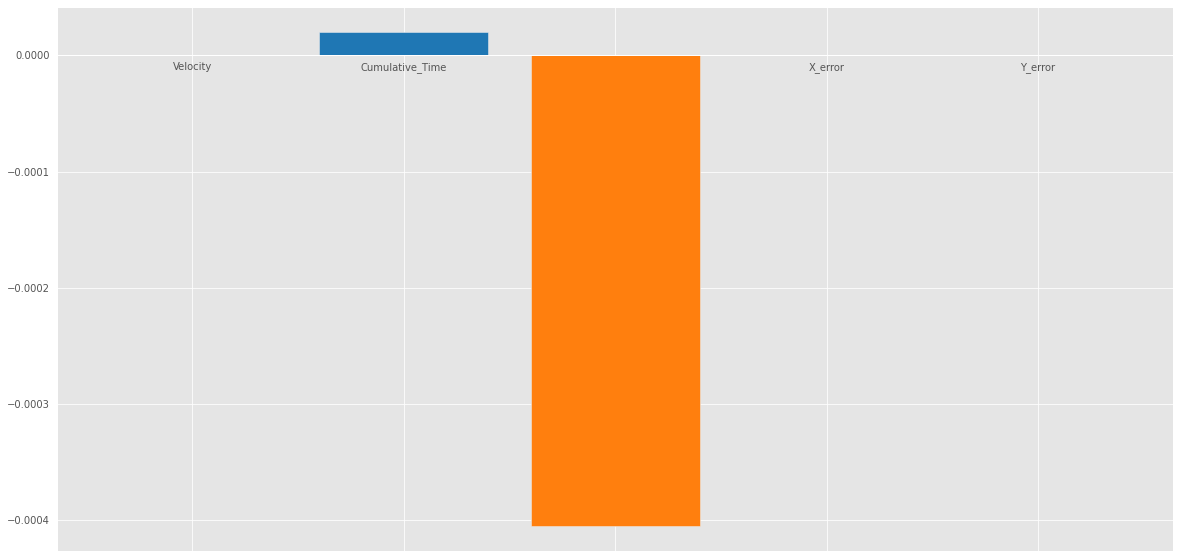

In [156]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize=(20,10))
color =['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',  
        'tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive'] 

ax.bar(enet_coef["Columns"],enet_coef['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 


In [157]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [158]:
X=roomba_data[['Theta','Velocity','Cumulative_Time','Cumulative_Theta','X_error','Y_error']]
Y=roomba_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


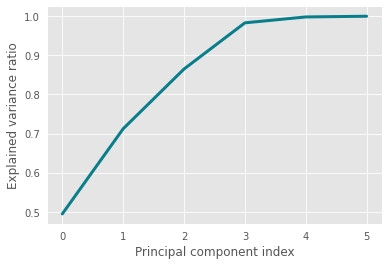

<Figure size 432x288 with 0 Axes>

In [159]:
from sklearn.decomposition import PCA

X=roomba_data[['Theta','Velocity','Cumulative_Time','Cumulative_Theta','X_error','Y_error']]
Y=roomba_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
# plt.title('Cumulative explained variance by number of principal components', size=10)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()
plt.savefig('Cumulative_explained_variance_roomba.png')

In [160]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)

In [161]:
loadings.head()


,PC1,PC2,PC3,PC4,PC5,PC6
Theta,-0.960168,0.076228,-0.103775,0.036216,-0.245967,-0.005977
Velocity,-0.315593,-0.223958,0.921752,0.030619,-0.004377,-0.003057
Cumulative_Time,-0.128610,0.776271,0.145855,-0.599777,0.014254,0.001867
Cumulative_Theta,-0.984474,-0.077310,-0.091449,0.014005,0.104104,0.076072
X_error,-0.020506,0.800365,0.110722,0.588573,0.025802,0.001449


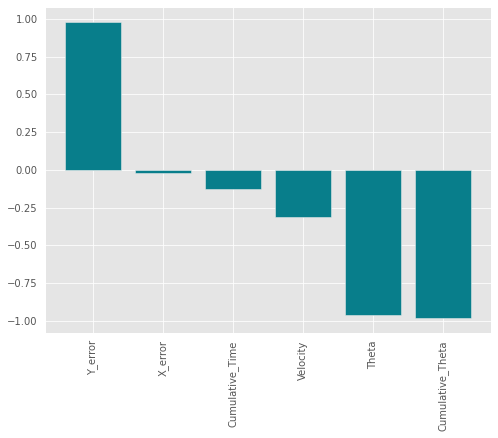

In [162]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']
plt.figure(figsize=(8,6))
plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
# plt.title('PCA loading scores (First principal component)', size=10)
plt.xticks(rotation='vertical')
plt.show()


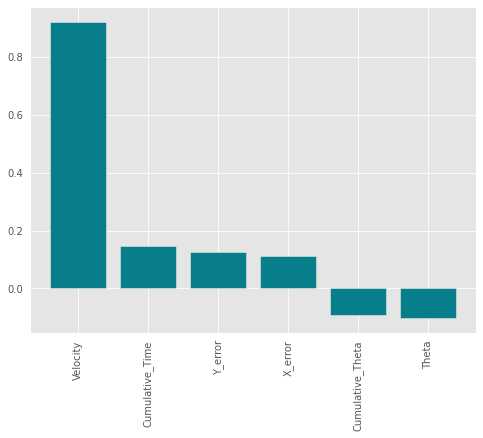

In [163]:
pc1_loadings = loadings.sort_values(by='PC3', ascending=False)[['PC3']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC3']
plt.figure(figsize=(8,6))
plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC3'], color='#087E8B')
# plt.title('PCA loading scores (First principal component)', size=10)
plt.xticks(rotation='vertical')
plt.show()

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [200]:

df1 = roomba_data[['Theta','Cumulative_Time','Distance_travelled_error','X_error','Y_error']]
nbrs1 = NearestNeighbors(n_neighbors = 10)

# fit model
nbrs1.fit(df1)

NearestNeighbors(n_neighbors=10)

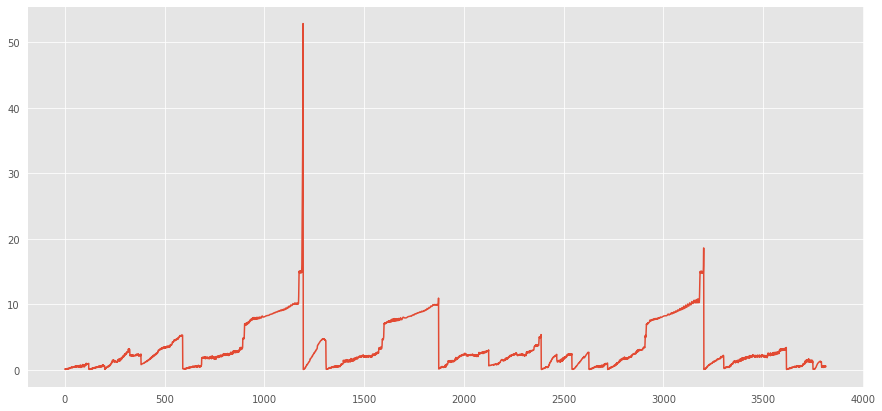

In [201]:
# distances and indexes of k-neaighbors from model outputs
distances1, indexes1 = nbrs1.kneighbors(df1)
# plot
plt.figure(figsize=(15, 7))
plt.plot(distances1.mean(axis =1))

In [202]:
distances1 = pd.DataFrame(distances1)
distances_mean1 = distances1.mean(axis =1)
distances_mean1

0       0.141418
1       0.121817
2       0.089633
3       0.166205
4       0.096922
          ...   
3810    0.521362
3811    0.615001
3812    0.573500
3813    0.455425
3814    0.611390
Length: 3815, dtype: float64

In [203]:
distances_mean1.describe()

count    3815.000000
mean        3.365540
std         3.490717
min         0.075665
25%         0.959625
50%         2.125522
75%         4.510943
max        52.853372
dtype: float64

In [210]:
th = 9.0
outlier_index1 = np.where(distances_mean1 > th)
outlier_index1

(array([1073, 1074, 1075, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086,
        1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097,
        1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108,
        1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119,
        1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130,
        1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141,
        1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152,
        1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163,
        1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174,
        1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185,
        1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1797, 1798,
        1799, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811,
        1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822,
        1823, 1824, 1825, 1826, 1827, 

In [211]:
outlier_values = df1.iloc[outlier_index1]
outlier_values

,Theta,Cumulative_Time,Distance_travelled_error,X_error,Y_error
1073,1.327195e-02,2678.454939,3.399721,1.470015,0.033592
1074,1.327195e-02,2689.321084,3.400388,1.468177,0.033544
1075,1.327195e-02,2700.220788,3.399721,1.464520,0.033448
1079,1.327195e-02,2744.054241,3.399721,1.455480,0.033212
1080,1.327195e-02,2755.071338,3.400388,1.451902,0.033118
...,...,...,...,...,...
3198,-2.449294e-16,4038.308509,0.000463,2.011614,0.021895
3199,-2.449294e-16,4048.776671,0.000775,2.008782,0.021864
3200,-2.449294e-16,4059.226040,0.000600,2.004548,0.021818
3201,-2.449294e-16,4069.656861,0.000500,2.000333,0.021772


Text(0, 0.5, 'Distance_travelled_error of the robot')

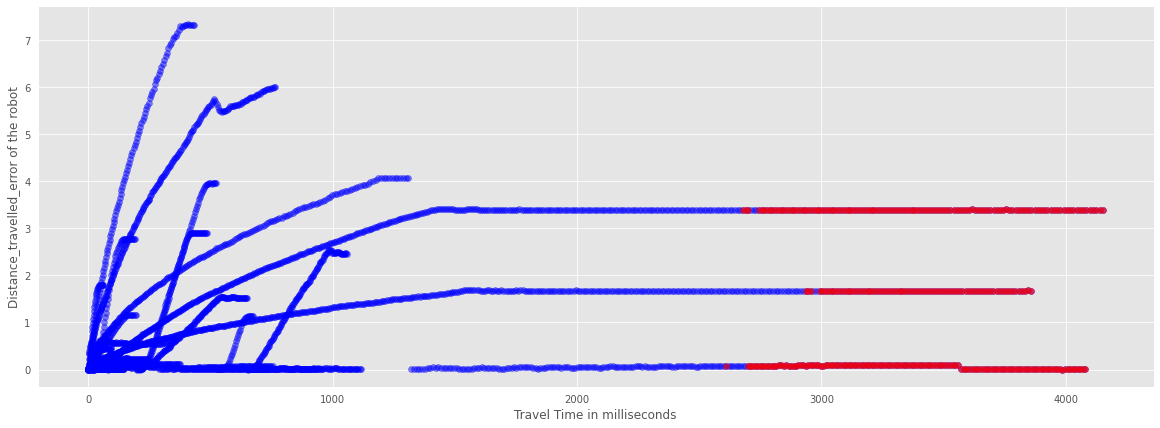

In [215]:
plt.figure(figsize=(20, 7))
plt.scatter(df1["Cumulative_Time"], df1["Distance_travelled_error"], color = "b",alpha=0.5)
# plot outlier values
plt.scatter(outlier_values["Cumulative_Time"], outlier_values["Distance_travelled_error"], color = "r",alpha=0.6)
plt.xlabel('Travel Time in milliseconds')
plt.ylabel('Distance_travelled_error of the robot')

Text(0, 0.5, 'Y_error of the robot')

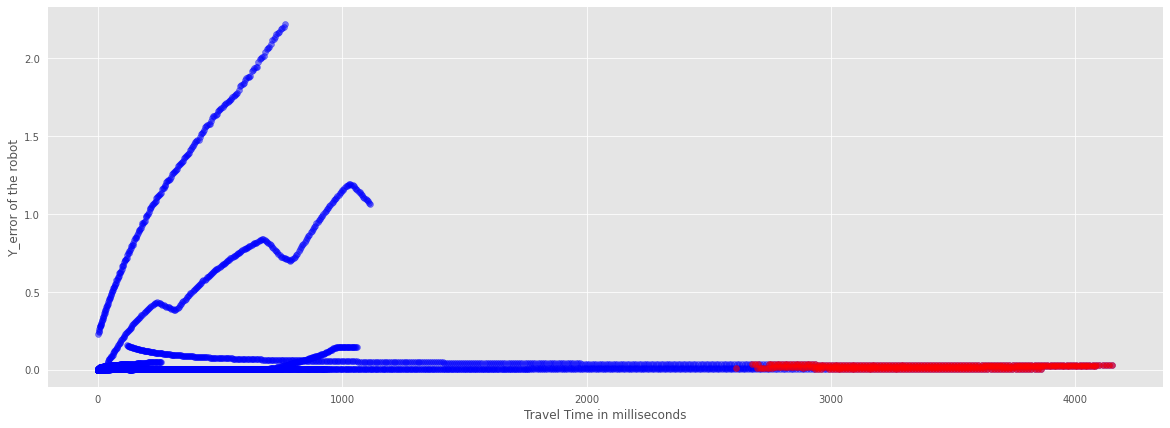

In [216]:
plt.figure(figsize=(20, 7))
plt.scatter(df1["Cumulative_Time"], df1["Y_error"], color = "b",alpha=0.5)
# plot outlier values
plt.scatter(outlier_values["Cumulative_Time"], outlier_values["Y_error"], color = "r",alpha=0.6)
plt.xlabel('Travel Time in milliseconds')
plt.ylabel('Y_error of the robot')

Text(0, 0.5, 'Distance_travelled_error')

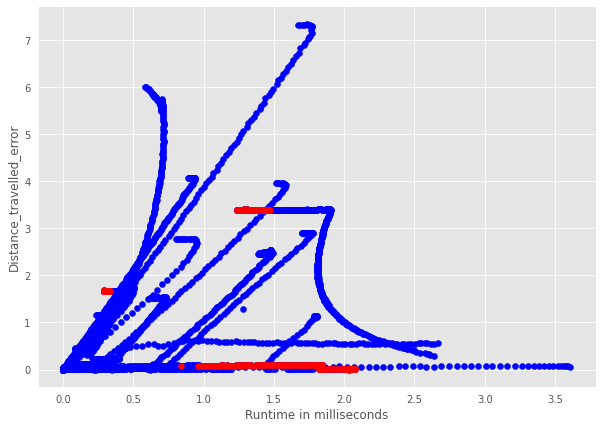

In [217]:
plt.figure(figsize=(10, 7))
plt.scatter(df1["X_error"], df1["Distance_travelled_error"], color = "b")
# plot outlier values
plt.scatter(outlier_values["X_error"], outlier_values["Distance_travelled_error"], color = "r")
plt.xlabel("Runtime in milliseconds")
plt.ylabel("Distance_travelled_error")